<a href="https://colab.research.google.com/github/akbarroyhan69-gif/running-pace-analyst-/blob/main/sudrunner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import PartialDependenceDisplay



Pada tahap ini dilakukan pemanggilan (import) beberapa pustaka (library) Python yang digunakan dalam proses pengolahan data, pemodelan, dan evaluasi model pada penelitian analisis faktor-faktor yang memengaruhi pace lari mahasiswa Universitas Darussalam (UNIDA).
Library pandas dan numpy digunakan untuk mengelola dan memanipulasi data hasil kuesioner mahasiswa, seperti membaca dataset, melakukan pembersihan data, serta mengolah variabel numerik yang berkaitan dengan karakteristik mahasiswa dan kebiasaan latihan lari.
Library scikit-learn digunakan sebagai pustaka utama dalam penerapan metode machine learning. Fungsi train_test_split digunakan untuk membagi dataset pace lari mahasiswa menjadi data latih dan data uji guna memastikan evaluasi model dilakukan secara objektif. Algoritma RandomForestRegressor digunakan untuk memprediksi nilai pace lari secara kontinu, sedangkan RandomForestClassifier digunakan untuk mengklasifikasikan pace lari mahasiswa ke dalam kategori tertentu, seperti cepat dan lambat.
Evaluasi performa model regresi dilakukan menggunakan metrik Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), serta koefisien determinasi (R²) untuk mengukur tingkat akurasi prediksi pace lari mahasiswa. Sementara itu, performa model klasifikasi dievaluasi menggunakan accuracy score, classification report, serta confusion matrix untuk menilai kemampuan model dalam mengklasifikasikan kategori pace lari.
Library matplotlib dan seaborn digunakan untuk menyajikan visualisasi data dan hasil analisis dalam bentuk grafik, sehingga memudahkan interpretasi pola hubungan antara faktor-faktor mahasiswa dengan pace lari. Selain itu, PartialDependenceDisplay digunakan untuk menganalisis pengaruh masing-masing variabel independen, seperti usia, berat badan, tinggi badan, dan frekuensi latihan, terhadap hasil prediksi pace lari yang dihasilkan oleh model Random Forest.

# Unggah Dataset ke Google Colab



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving s.xlsx to s.xlsx


Pada tahap ini digunakan modul files dari google.colab untuk melakukan proses unggah (upload) dataset ke lingkungan Google Colab. Perintah files.upload() memungkinkan peneliti mengunggah file dataset secara langsung dari perangkat lokal ke sesi Colab yang sedang digunakan.
Dataset yang diunggah merupakan data hasil kuesioner mahasiswa Universitas Darussalam (UNIDA) yang berisi variabel-variabel yang berkaitan dengan karakteristik mahasiswa dan kebiasaan aktivitas lari, yang selanjutnya digunakan dalam analisis dan pemodelan pace lari. Setelah proses unggah dilakukan, file tersebut akan tersimpan sementara di direktori kerja Colab dan dapat diakses menggunakan library pandas untuk tahap pengolahan data berikutnya.
Tahap ini sangat penting karena menjadi langkah awal dalam integrasi data penelitian ke dalam sistem, sehingga seluruh proses pembersihan data, analisis, dan pembangunan model Random Forest dapat dilakukan secara terstruktur dan sistematis.

# Membaca dan Membersihkan Dataset



In [ ]:
d=pd.read_excel('s.xlsx')
d=d.dropna(how='all')

Pada tahap ini dilakukan proses pembacaan dataset penelitian menggunakan fungsi read_excel() dari library pandas. File s.xlsx merupakan dataset yang berisi data hasil kuesioner mahasiswa Universitas Darussalam (UNIDA) yang mencakup berbagai variabel yang berkaitan dengan karakteristik individu dan kebiasaan aktivitas lari mahasiswa, yang digunakan sebagai dasar analisis pace lari.

Selanjutnya, dilakukan proses pembersihan data dengan menggunakan perintah dropna(how='all'). Perintah ini bertujuan untuk menghapus baris data yang seluruh nilai pada kolomnya kosong (missing values). Langkah ini dilakukan untuk memastikan bahwa hanya data yang memiliki informasi relevan yang digunakan dalam proses analisis dan pemodelan, sehingga dapat meningkatkan kualitas dataset dan mengurangi potensi gangguan dalam proses pelatihan model.

# Standarisasi Format Data



In [ ]:

d["pace"] = d["pace"].astype(str).str.replace(",", ".")
d["semester"] = d["semester"].astype(str).str.replace("semester","")



Pada tahap ini dilakukan proses standarisasi dan penyesuaian format data pada beberapa variabel penting agar dapat diproses secara numerik oleh sistem machine learning.

Baris kode d["pace"] = d["pace"].astype(str).str.replace(",", ".") digunakan untuk mengubah nilai pada variabel pace lari ke dalam format teks sementara, kemudian mengganti tanda koma (,) menjadi tanda titik (.). Langkah ini dilakukan karena perbedaan format penulisan desimal pada data kuesioner, sehingga perlu diseragamkan agar nilai pace dapat dikonversi ke bentuk numerik secara benar pada tahap selanjutnya.

Selanjutnya, baris kode d["semester"] = d["semester"].astype(str).str.replace("semester","") digunakan untuk membersihkan variabel semester dengan menghapus teks non-numerik “semester”. Proses ini bertujuan agar nilai semester hanya berisi angka, sehingga dapat digunakan sebagai variabel numerik dalam analisis dan pemodelan.

# Konversi Tipe Data dan Penanganan Nilai Kosong






In [ ]:


# Konversi tipe numeric
num_cols = ["semester", "usia", "tinggi", "latihan_per_minggu", "berat", "pace", "perokok"]

for col in num_cols:
    d[col] = pd.to_numeric(d[col], errors="coerce")

# Kolom int (kecuali pace dan perokok)
cols_to_int = [col for col in num_cols if col not in ['pace', 'perokok']]

# Tangani NaN
d[cols_to_int] = d[cols_to_int].fillna(0).astype('int64')

# Ubah perokok menjadi boolean
d['perokok'] = d['perokok'].fillna(0).astype(bool)

Pada tahap ini dilakukan proses konversi tipe data numerik serta penanganan nilai kosong (missing values) pada dataset hasil kuesioner mahasiswa Universitas Darussalam (UNIDA). Proses ini bertujuan untuk memastikan seluruh variabel dapat diproses dengan baik oleh algoritma machine learning.

*   Variabel yang bersifat numerik, yaitu semester, usia, tinggi badan, frekuensi latihan per minggu, berat badan, pace lari, dan status perokok, dikonversi ke tipe numerik menggunakan fungsi to_numeric() dengan parameter errors="coerce". Parameter ini berfungsi untuk mengubah nilai yang tidak dapat dikonversi menjadi numerik menjadi nilai kosong (NaN), sehingga memudahkan proses pembersihan data selanjutnya.
*   Selanjutnya, dilakukan pemisahan kolom yang akan dikonversi ke tipe bilangan bulat (integer), yaitu seluruh variabel numerik kecuali pace lari dan status perokok. Nilai kosong pada kolom-kolom tersebut diisi dengan nilai nol, kemudian dikonversi ke tipe data int64. Langkah ini dilakukan karena variabel seperti semester, usia, tinggi badan, berat badan, dan frekuensi latihan secara konseptual merupakan data diskrit.


*   Untuk variabel status perokok, nilai kosong diisi dengan nol dan kemudian dikonversi ke tipe data boolean (True/False). Konversi ini bertujuan untuk merepresentasikan status perokok sebagai variabel biner, sehingga lebih sesuai untuk digunakan dalam proses pemodelan dan analisis faktor yang memengaruhi pace lari mahasiswa.

Tahap konversi tipe data dan penanganan nilai kosong ini merupakan bagian penting dari data preprocessing, karena memastikan konsistensi dan validitas data, serta meningkatkan keandalan model Random Forest dalam menganalisis dan memprediksi pace lari mahasiswa UNIDA.

# Perhitungan Indeks Massa Tubuh (IMT)

In [ ]:
d['tinggi_m'] = d['tinggi'] / 100
d['imt'] = d['berat'] / (d['tinggi_m'] ** 2)

Pada tahap ini dilakukan proses pembentukan variabel turunan (feature engineering) berupa Indeks Massa Tubuh (IMT) yang digunakan untuk menggambarkan komposisi tubuh mahasiswa.

Baris kode d['tinggi_m'] = d['tinggi'] / 100 digunakan untuk mengonversi tinggi badan mahasiswa dari satuan sentimeter ke meter. Konversi ini diperlukan agar perhitungan IMT dapat dilakukan sesuai dengan rumus standar yang menggunakan satuan meter.

Selanjutnya, baris kode d['imt'] = d['berat'] / (d['tinggi_m'] ** 2) digunakan untuk menghitung nilai Indeks Massa Tubuh dengan membagi berat badan (kilogram) dengan kuadrat tinggi badan (meter). Nilai IMT yang dihasilkan mencerminkan proporsi berat badan terhadap tinggi badan dan digunakan sebagai salah satu variabel independen dalam analisis faktor-faktor yang memengaruhi pace lari mahasiswa Universitas Darussalam (UNIDA).

Pembentukan variabel IMT ini bertujuan untuk memperkaya informasi dalam dataset dan membantu model Random Forest dalam menangkap hubungan antara kondisi fisik mahasiswa dengan performa lari, khususnya dalam hal pace lari.



In [ ]:
# Kategori pace untuk data asli
d["kategori_pace"] = d["pace"].apply(lambda x: "cepat" if x < 5 else "lambat")



# Augmentasi Data

In [ ]:
# ---------------------------
# AUGMENTASI
# ---------------------------
def augment_row(row, n=5):
    augmented = []
    for _ in range(n):
        new_row = row.copy()
        new_row["pace"] += np.random.uniform(0, 0.3)
        new_row["pace"] = round(new_row["pace"], 2)
        new_row["berat"] += np.random.randint(0, 5)
        augmented.append(new_row)
    return augmented

augmented_rows = []
for i in range(len(d)):
    augmented_rows.extend(augment_row(d.iloc[i], n=5))

augmented_df = pd.DataFrame(augmented_rows)
augmented_df["kategori_pace"] = augmented_df["pace"].apply(lambda x: "cepat" if x < 5 else "lambat")




Pada tahap ini dilakukan augmentasi data untuk meningkatkan jumlah dan variasi data latih yang digunakan dalam pemodelan pace lari mahasiswa Universitas Darussalam (UNIDA). Augmentasi data dilakukan karena jumlah data asli relatif terbatas, sehingga diperlukan penambahan variasi data sintetis agar model Random Forest dapat belajar dengan lebih baik dan mengurangi risiko overfitting.

Fungsi augment_row() digunakan untuk menghasilkan beberapa data baru dari satu baris data asli. Pada setiap proses augmentasi, nilai pace lari dimodifikasi dengan menambahkan nilai acak kecil dalam rentang 0 hingga 0,3 menit per kilometer. Penambahan ini bertujuan untuk mensimulasikan variasi alami performa lari mahasiswa yang dapat dipengaruhi oleh kondisi fisik dan lingkungan. Nilai pace kemudian dibulatkan hingga dua angka desimal agar tetap realistis.

Selain itu, nilai berat badan juga dimodifikasi dengan menambahkan bilangan bulat acak antara 0 hingga 4 kilogram. Perubahan ini dimaksudkan untuk merepresentasikan variasi ringan pada berat badan mahasiswa yang masih berada dalam rentang wajar dan dapat terjadi dalam kondisi nyata, misalnya akibat perbedaan waktu pengukuran atau kondisi tubuh.

Proses augmentasi dilakukan sebanyak lima kali untuk setiap data asli, sehingga setiap entri data menghasilkan lima data baru. Seluruh data hasil augmentasi kemudian digabungkan ke dalam sebuah DataFrame baru (augmented_df) yang digunakan sebagai dataset tambahan dalam proses pemodelan.

Selanjutnya, dilakukan pembentukan variabel target kategori pace, yaitu cepat dan lambat. Kategori cepat diberikan untuk nilai pace kurang dari 5 menit per kilometer, sedangkan kategori lambat diberikan untuk nilai pace sama dengan atau lebih dari 5 menit per kilometer. Pengelompokan ini digunakan untuk mendukung analisis klasifikasi pace lari mahasiswa.

Tahap augmentasi data ini berperan penting dalam meningkatkan keberagaman data, memperkuat kemampuan generalisasi model Random Forest, serta menghasilkan model yang lebih stabil dan andal dalam menganalisis faktor-faktor yang memengaruhi pace lari mahasiswa UNIDA.

In [ ]:
d['pace'].count()

np.int64(118)

# Penggabungan Data Asli dan Data Hasil Augmentasi

In [ ]:

full_df = pd.concat([d, augmented_df], ignore_index=True)
full_df = full_df.dropna()

Pada tahap ini dilakukan proses penggabungan dataset asli dengan dataset hasil augmentasi untuk membentuk dataset akhir yang digunakan dalam proses pemodelan. Penggabungan dilakukan menggunakan fungsi pd.concat() dengan parameter ignore_index=True, sehingga seluruh data, baik data asli maupun data hasil augmentasi, disatukan dalam satu struktur data tanpa mempertahankan indeks lama.

Dataset gabungan (full_df) kemudian melalui proses pembersihan lanjutan dengan menggunakan fungsi dropna(). Langkah ini bertujuan untuk menghapus baris data yang masih mengandung nilai kosong (missing values) setelah proses penggabungan, sehingga dataset akhir hanya berisi data yang lengkap dan valid.

Tahap ini sangat penting karena memastikan bahwa model Random Forest dilatih menggunakan dataset yang lebih besar, lebih bervariasi, dan bebas dari nilai kosong. Dengan demikian, kualitas data latih meningkat, risiko kesalahan dalam proses pelatihan model dapat diminimalkan, serta hasil analisis faktor-faktor yang memengaruhi pace lari mahasiswa Universitas Darussalam (UNIDA) menjadi lebih akurat dan dapat diandalkan.

# Penentuan Variabel Independen dan Variabel Target

In [ ]:

X = full_df[["semester","tinggi","berat","imt","usia","latihan_per_minggu","perokok"]]
y_reg = full_df["pace"]
y_clf = full_df["kategori_pace"]

Pada tahap ini dilakukan proses pemisahan antara variabel independen (fitur) dan variabel target yang akan digunakan dalam pemodelan pace lari mahasiswa Universitas Darussalam (UNIDA).

Variabel independen (X) terdiri atas semester, tinggi badan, berat badan, Indeks Massa Tubuh (IMT), usia, frekuensi latihan per minggu, dan status perokok. Variabel-variabel ini dipilih karena secara teoritis dan empiris memiliki keterkaitan dengan performa lari dan kondisi fisik mahasiswa.

Variabel target dibedakan menjadi dua jenis sesuai dengan tujuan pemodelan. Variabel y_reg digunakan untuk keperluan regresi, yaitu memprediksi nilai pace lari mahasiswa dalam bentuk numerik kontinu. Sementara itu, variabel y_clf digunakan untuk keperluan klasifikasi, yaitu mengelompokkan pace lari mahasiswa ke dalam kategori cepat dan lambat berdasarkan batasan nilai pace yang telah ditentukan sebelumnya.

Pemisahan variabel ini bertujuan agar proses pelatihan dan evaluasi model Random Forest dapat dilakukan secara terstruktur, baik untuk pendekatan regresi maupun klasifikasi, sehingga hasil analisis faktor-faktor yang memengaruhi pace lari mahasiswa UNIDA dapat diperoleh secara lebih komprehensif.

# Pembagian Data Latih dan Data Uji

In [ ]:
X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X, y_reg, y_clf, test_size=0.2, random_state=42)

Pada tahap ini dilakukan proses pembagian dataset menjadi data latih (training data) dan data uji (testing data) menggunakan fungsi train_test_split. Pembagian ini bertujuan untuk memastikan bahwa evaluasi performa model dilakukan secara objektif dan tidak bias terhadap data yang digunakan dalam proses pelatihan.

Dataset dibagi dengan proporsi 80% data latih dan 20% data uji, sebagaimana ditentukan oleh parameter test_size=0.2. Data latih digunakan untuk membangun dan melatih model Random Forest, sedangkan data uji digunakan untuk mengukur kemampuan model dalam memprediksi dan mengklasifikasikan pace lari mahasiswa pada data yang belum pernah dilihat sebelumnya.

Parameter random_state=42 digunakan untuk menjaga konsistensi dan reprodusibilitas hasil penelitian, sehingga proses pembagian data dapat menghasilkan susunan data yang sama apabila penelitian dijalankan kembali.

Dalam pembagian ini, variabel independen (X) serta dua jenis variabel target, yaitu pace lari numerik untuk regresi (y_reg) dan kategori pace untuk klasifikasi (y_clf), dibagi secara bersamaan. Hal ini dilakukan agar data latih dan data uji untuk regresi dan klasifikasi tetap selaras dan berasal dari observasi yang sama.

Tahap pembagian data ini merupakan langkah krusial dalam proses pemodelan, karena menentukan kualitas evaluasi dan validitas hasil analisis faktor-faktor yang memengaruhi pace lari mahasiswa Universitas Darussalam (UNIDA).

# Validasi dan Penyesuaian Tipe Data Fitur

In [ ]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

In [ ]:
y_clf_train.head()
y_clf_train.dtype

dtype('O')

# Pembangunan dan Prediksi Model Random Forest

In [ ]:
# ---------------------------
# MODEL
# ---------------------------
reg_model = RandomForestRegressor().fit(X_train, y_reg_train)
clf_model = RandomForestClassifier().fit(X_train, y_clf_train)
pred_pace = reg_model.predict(X_test)
pred_kategori = clf_model.predict(X_test)
pred_auto_kategori = ["cepat" if p < 5 else "lambat" for p in pred_pace]


Pada tahap ini dilakukan proses pembangunan dan pelatihan model Random Forest untuk menganalisis serta memprediksi pace lari mahasiswa Universitas Darussalam (UNIDA) menggunakan dua pendekatan, yaitu regresi dan klasifikasi.

Model Random Forest Regressor dibangun dan dilatih menggunakan data latih (X_train dan y_reg_train) untuk memprediksi nilai pace lari mahasiswa dalam bentuk numerik kontinu. Model ini bertujuan untuk memberikan estimasi waktu tempuh lari per kilometer berdasarkan karakteristik mahasiswa dan kebiasaan latihan yang dimiliki.

Selain itu, model Random Forest Classifier dibangun dan dilatih menggunakan data latih yang sama untuk mengklasifikasikan pace lari mahasiswa ke dalam kategori cepat dan lambat. Pendekatan klasifikasi ini digunakan untuk memberikan gambaran kategorikal mengenai performa lari mahasiswa.

Setelah proses pelatihan selesai, kedua model digunakan untuk melakukan prediksi pada data uji (X_test). Model regresi menghasilkan prediksi nilai pace (pred_pace), sedangkan model klasifikasi menghasilkan prediksi kategori pace (pred_kategori).

Selain prediksi klasifikasi langsung dari model, dilakukan pula pembentukan kategori pace otomatis (pred_auto_kategori) berdasarkan hasil prediksi regresi. Kategori cepat diberikan untuk nilai pace kurang dari 5 menit per kilometer, sedangkan kategori lambat diberikan untuk nilai pace sama dengan atau lebih dari 5 menit per kilometer. Pendekatan ini digunakan untuk membandingkan hasil klasifikasi berbasis model dengan klasifikasi berbasis ambang batas nilai pace.

Tahap pemodelan ini menjadi inti dari penelitian, karena memungkinkan analisis hubungan antara faktor-faktor mahasiswa dengan pace lari, serta memberikan dasar evaluasi terhadap kinerja model Random Forest dalam konteks prediksi dan klasifikasi pace lari mahasiswa UNIDA.

In [ ]:
print("Jumlah data training :", X_train.shape[0])
print("Jumlah data testing  :", X_test.shape[0])

print("Target regresi - train :", y_reg_train.shape[0])
print("Target regresi - test  :", y_reg_test.shape[0])

print("Target klasifikasi - train :", y_clf_train.shape[0])
print("Target klasifikasi - test  :", y_clf_test.shape[0])

Jumlah data training : 566
Jumlah data testing  : 142
Target regresi - train : 566
Target regresi - test  : 142
Target klasifikasi - train : 566
Target klasifikasi - test  : 142


# Evaluasi Performa Mode

In [ ]:
# ---------------------------
# EVALUASI
# ---------------------------
print("=== REGRESI ===")
print("MAE :", mean_absolute_error(y_reg_test, pred_pace))
print("MSE :", mean_squared_error(y_reg_test, pred_pace))
print("RMSE:", np.sqrt(mean_squared_error(y_reg_test, pred_pace)))
print("R²  :", r2_score(y_reg_test, pred_pace))

print("\n=== KLASIFIKASI LANGSUNG ===")
print("Accuracy:", accuracy_score(y_clf_test, pred_kategori))
print(classification_report(y_clf_test, pred_kategori))



=== REGRESI ===
MAE : 0.26960648486880917
MSE : 0.22802104023025513
RMSE: 0.47751548690095397
R²  : 0.9871220862755643

=== KLASIFIKASI LANGSUNG ===
Accuracy: 1.0
              precision    recall  f1-score   support

       cepat       1.00      1.00      1.00        14
      lambat       1.00      1.00      1.00       128

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



Evaluasi model regresi dilakukan dengan membandingkan nilai pace lari aktual (y_reg_test) dengan hasil prediksi model (pred_pace). Beberapa metrik evaluasi digunakan, yaitu Mean Absolute Error (MAE) untuk mengukur rata-rata selisih absolut antara nilai aktual dan prediksi, Mean Squared Error (MSE) untuk mengukur rata-rata kuadrat kesalahan prediksi, serta Root Mean Squared Error (RMSE) yang memberikan gambaran kesalahan prediksi dalam satuan yang sama dengan variabel pace. Selain itu, digunakan pula koefisien determinasi (R²) untuk menunjukkan seberapa besar variasi pace lari mahasiswa yang dapat dijelaskan oleh model.

Nilai MAE, MSE, dan RMSE yang relatif kecil serta nilai R² yang mendekati satu menunjukkan bahwa model regresi Random Forest memiliki tingkat akurasi yang baik dalam memprediksi pace lari mahasiswa.

Evaluasi Model Klasifikasi

Evaluasi model klasifikasi dilakukan dengan membandingkan hasil prediksi kategori pace (pred_kategori) dengan kategori aktual (y_clf_test). Metrik accuracy digunakan untuk mengukur persentase prediksi yang benar, sedangkan classification report digunakan untuk menampilkan nilai precision, recall, dan F1-score pada masing-masing kelas kategori pace (cepat dan lambat).

Hasil evaluasi ini memberikan gambaran mengenai kemampuan model Random Forest dalam mengklasifikasikan performa lari mahasiswa secara tepat, serta menjadi dasar untuk menilai keandalan model dalam mendukung analisis faktor-faktor yang memengaruhi pace lari mahasiswa UNIDA

In [ ]:
# ---------------------------
# VISUALISASI REGRESI
# ---------------------------

mae = mean_absolute_error(y_reg_test, pred_pace)
mse = mean_squared_error(y_reg_test, pred_pace)
rmse = np.sqrt(mse)
r2 = r2_score(y_reg_test, pred_pace)

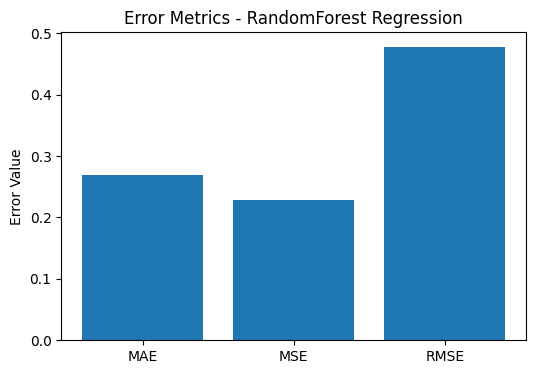

In [ ]:
# Bar chart MAE/MSE/RMSE
plt.figure(figsize=(6,4))
plt.bar(["MAE", "MSE", "RMSE"], [mae, mse, rmse])
plt.title("Error Metrics - RandomForest Regression")
plt.ylabel("Error Value")
plt.show()

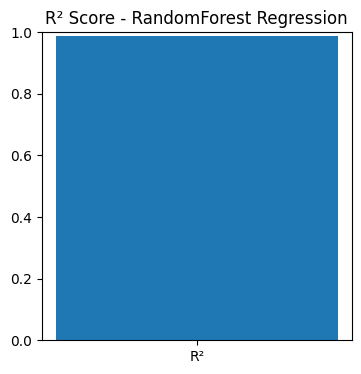

In [ ]:
# R2 Score
plt.figure(figsize=(4,4))
plt.bar(["R²"], [r2])
plt.ylim(0,1)
plt.title("R² Score - RandomForest Regression")
plt.show()

In [ ]:
# ---------------------------
# FEATURE IMPORTANCE
# ---------------------------
feat_names = X.columns

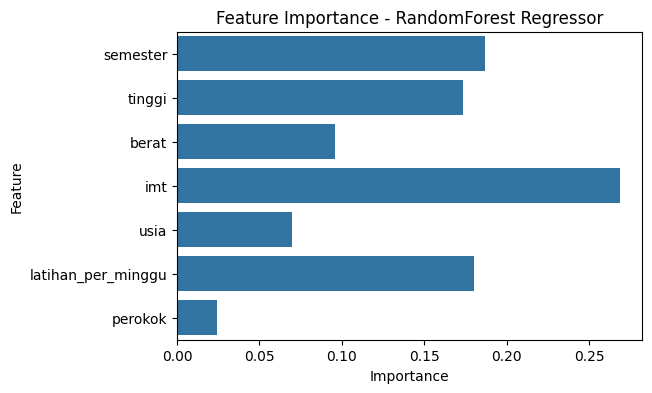

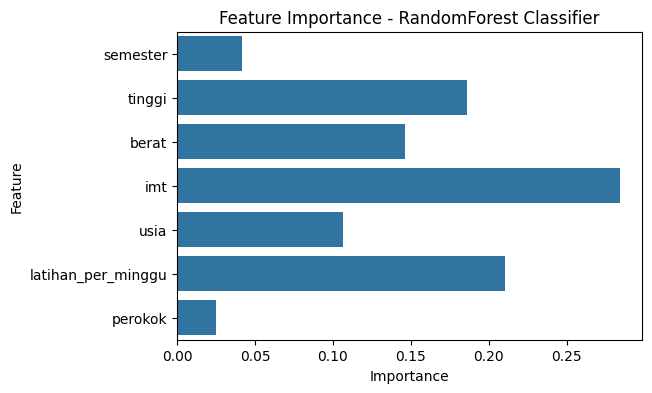

In [ ]:
# Regressor
plt.figure(figsize=(6,4))
sns.barplot(x=reg_model.feature_importances_, y=feat_names)
plt.title("Feature Importance - RandomForest Regressor")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Classifier
plt.figure(figsize=(6,4))
sns.barplot(x=clf_model.feature_importances_, y=feat_names)
plt.title("Feature Importance - RandomForest Classifier")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
print (full_df.iloc[121])

Timestamp             2025-05-15 06:01:09.244000
Email Address              anggamarifat@gmai.com
Score                                       0.00
Name                                Pujangga aji
Email                      anggamarifat@gmai.com
semester                                       7
usia                                          22
pace                                        8.18
berat                                         71
tinggi                                       162
latihan_per_minggu                             3
perokok                                     True
tinggi_m                                    1.62
imt                                        25.91
kategori_pace                             lambat
Name: 123, dtype: object


In [ ]:
full_df["imt"].count()

np.int64(708)

In [ ]:
stk = full_df.describe()

pd.set_option('display.float_format', '{:.2f}'.format)

stk = full_df.describe()
print(stk)

#

                           Timestamp  Score  semester   usia   pace  berat  \
count                            708 708.00    708.00 708.00 708.00 708.00   
mean   2025-07-16 09:14:23.869330432   0.00      2.93  19.64   8.80  63.47   
min       2025-05-15 06:01:09.244000   0.00      1.00  17.00   3.00  42.00   
25%    2025-06-23 08:06:31.355000064   0.00      1.00  18.00   5.56  56.00   
50%    2025-07-28 06:50:03.282000128   0.00      1.00  19.00   7.20  62.00   
75%    2025-07-29 08:39:44.095000064   0.00      6.00  21.00  10.23  69.00   
max       2025-10-02 11:24:27.771000   0.00      7.00  25.00  20.26 105.00   
std                              NaN   0.00      2.62   1.65   4.18  10.54   

       tinggi  latihan_per_minggu  tinggi_m    imt  
count  708.00              708.00    708.00 708.00  
mean   165.75                2.73      1.66  22.50  
min    144.00                1.00      1.44  15.43  
25%    162.00                1.00      1.62  19.84  
50%    166.50                3.0

<Axes: >

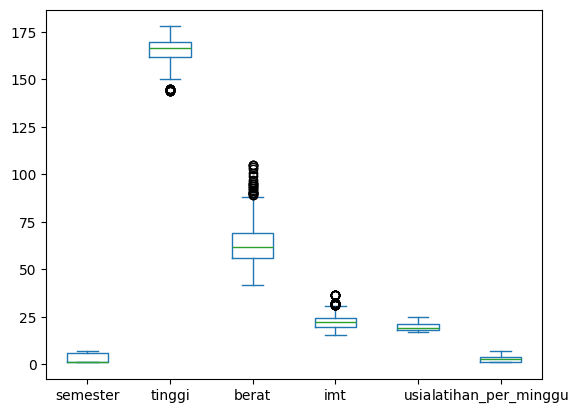

In [ ]:
X.plot(kind='box',)

In [ ]:
print(reg_model.feature_importances_)

[0.18712004 0.17381272 0.09615966 0.26874209 0.06968838 0.18020019
 0.02427692]


In [ ]:



# X_train adalah data fitur

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': reg_model.feature_importances_
})

# Urutkan dari yang paling penting
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

              Feature  Importance
3                 imt        0.27
0            semester        0.19
5  latihan_per_minggu        0.18
1              tinggi        0.17
2               berat        0.10
4                usia        0.07
6             perokok        0.02


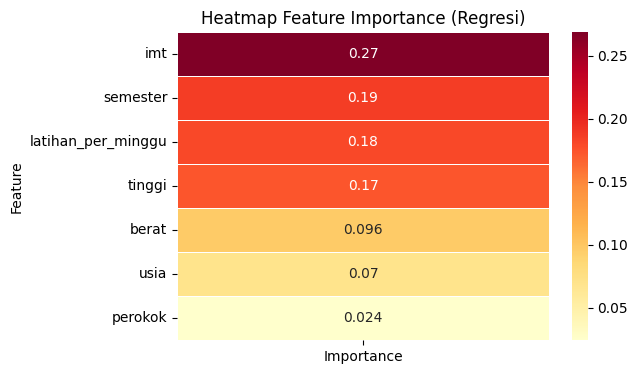

In [ ]:


# === 2. Buat Heatmap ===
plt.figure(figsize=(6, 4))

sns.heatmap(
    feature_importance[['Importance']].set_index(feature_importance['Feature']),
    annot=True,          # tampilkan nilai
    cmap="YlOrRd",       # warna heatmap
    linewidths=0.5
)

plt.title("Heatmap Feature Importance (Regresi)")
plt.show()

# Analisis Partial Dependence Plot (PDP)

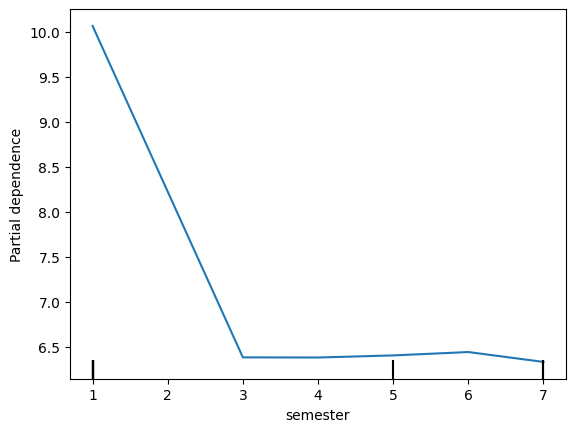

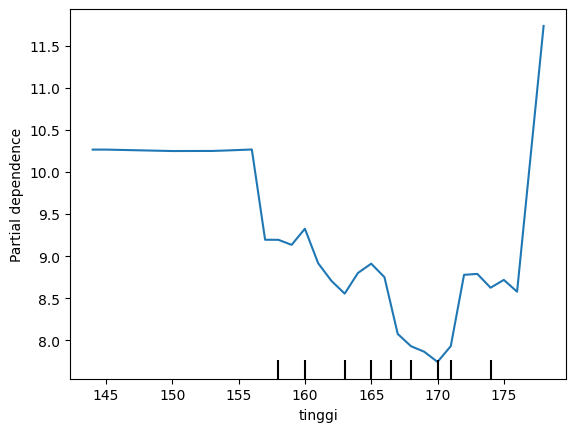

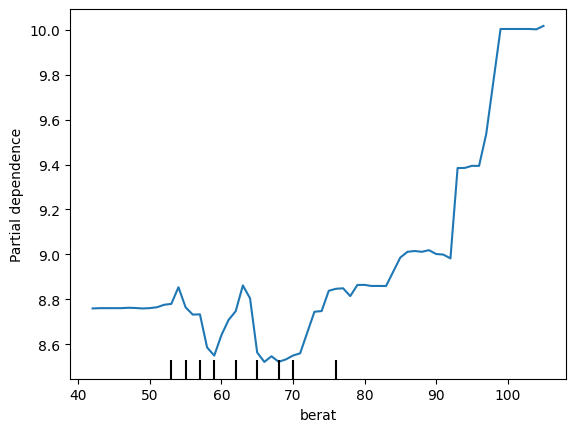

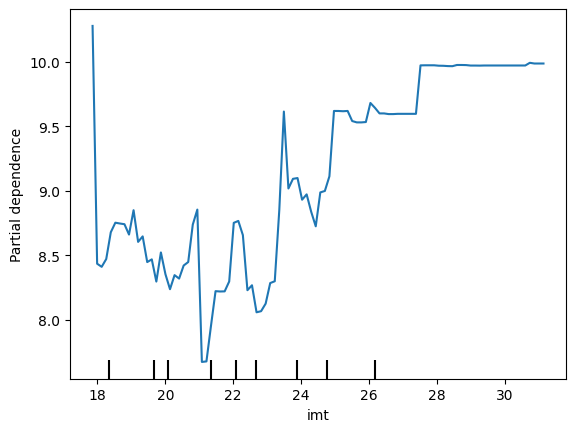

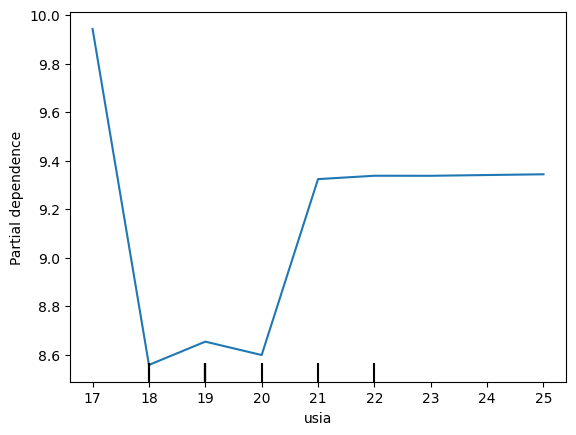

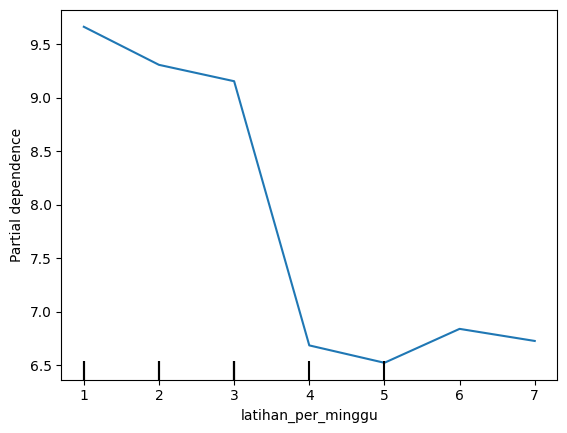

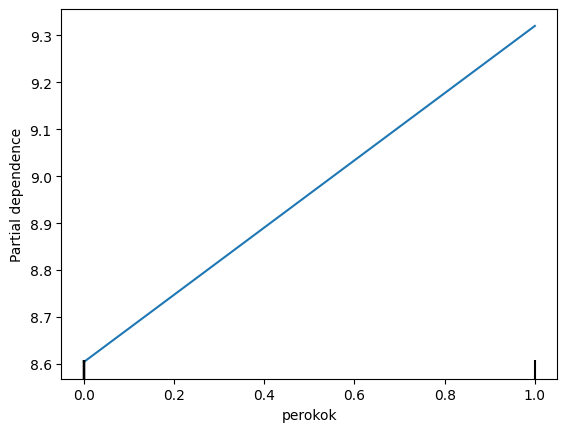

In [ ]:


features = X_train.columns
rf = reg_model

for feature in features:
    fig, ax = plt.subplots()
    PartialDependenceDisplay.from_estimator(
        rf,
        X,
        [feature],
        ax=ax
    )
    plt.show()

Melalui analisis PDP ini, peneliti dapat mengidentifikasi variabel-variabel yang memiliki pengaruh signifikan terhadap pace lari mahasiswa UNIDA, serta memahami arah dan pola pengaruh tersebut, apakah bersifat meningkat, menurun, atau non-linear. Hasil analisis ini memperkuat pembahasan mengenai faktor-faktor yang memengaruhi pace lari dan mendukung temuan yang diperoleh dari evaluasi kinerja model Random Forest.

# Visualisasi Hubungan Fitur terhadap Pace Lari

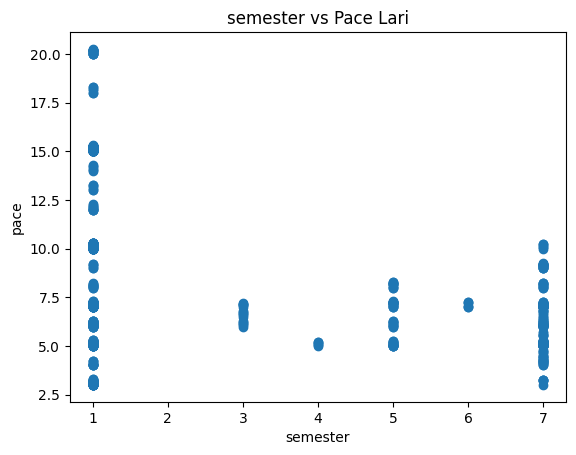

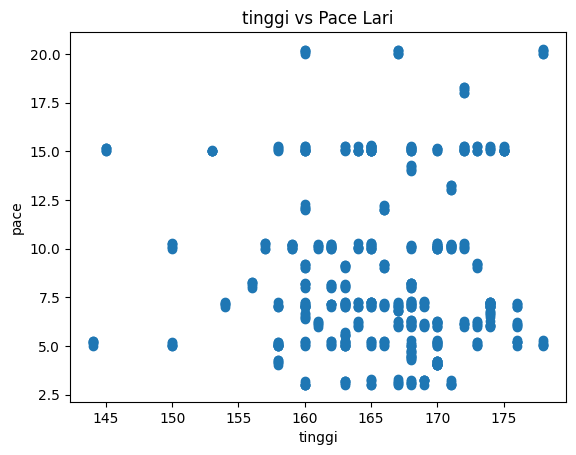

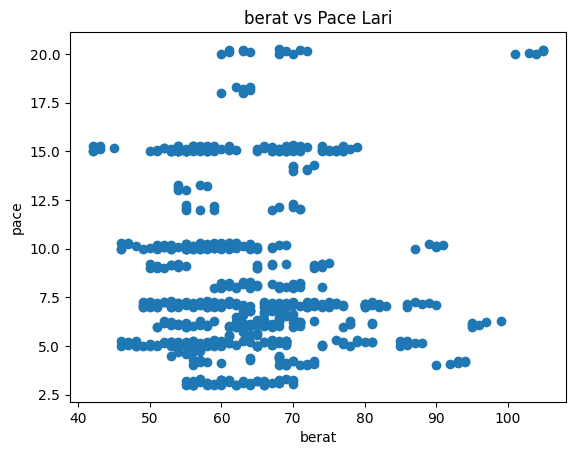

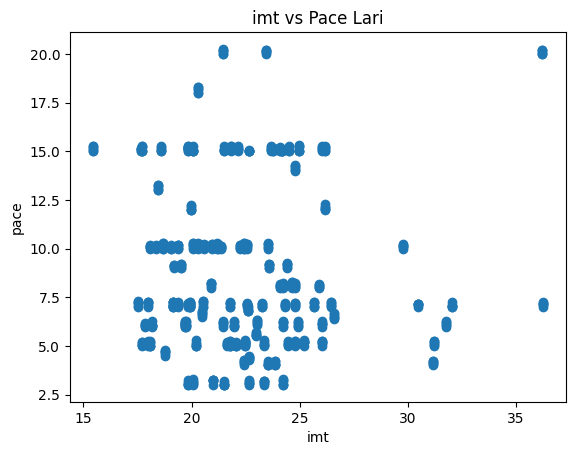

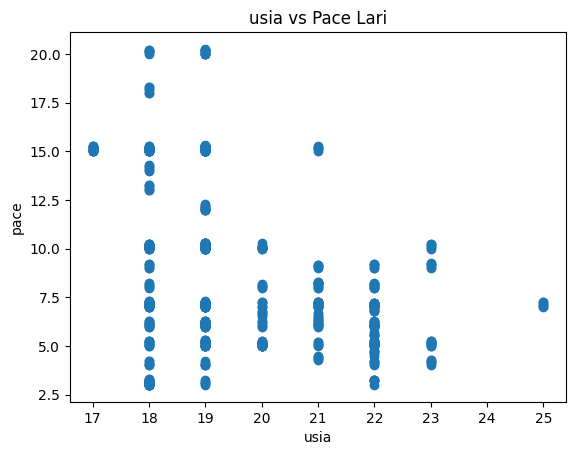

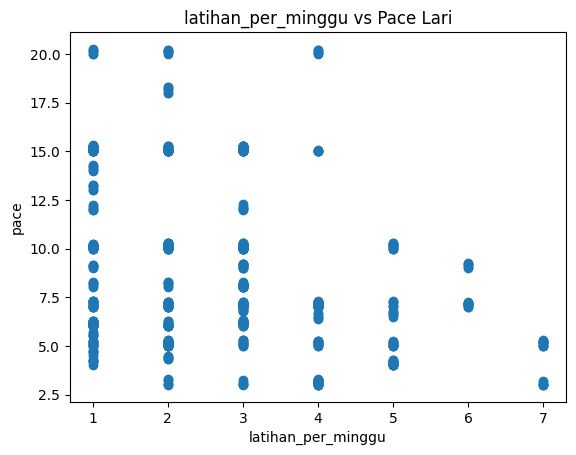

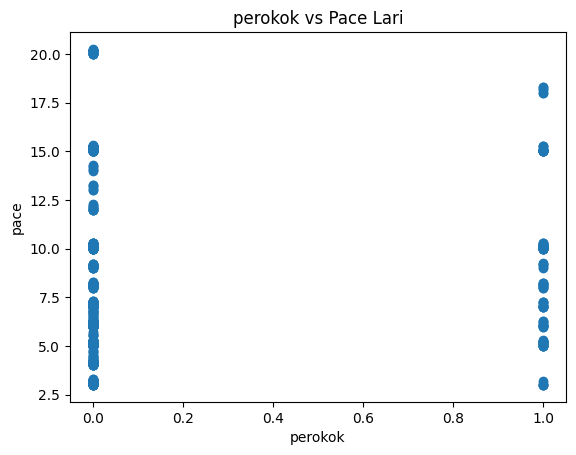

In [ ]:


features1 = X_train.columns
rf = reg_model

for feature in features1:
    plt.figure()
    plt.scatter(X[feature], y_reg)
    plt.xlabel(feature)
    plt.ylabel('pace')
    plt.title(f'{feature} vs Pace Lari')
    plt.show()

Melalui grafik ini, peneliti dapat mengamati apakah terdapat hubungan linear maupun non-linear, variasi data yang tinggi, serta kemungkinan adanya pencilan (outlier). Informasi ini berguna untuk mendukung hasil analisis model Random Forest dan memperkuat interpretasi terhadap faktor-faktor yang memengaruhi pace lari mahasiswa Universitas Darussalam (UNIDA).

# Penampilan Sampel Data Hasil Pengolahan

In [ ]:
# Data asli urutan ke-1 s.d ke-5 (index 0–4)
sample_aug = full_df.iloc[0:5]

print("=== 5 Data Asli (Urutan ke-1 s.d ke-5) ===")
display(sample_aug)

=== 5 Data Asli (Urutan ke-1 s.d ke-5) ===


,Timestamp,Email Address,Score,Name,Email,semester,usia,pace,berat,tinggi,latihan_per_minggu,perokok,tinggi_m,imt,kategori_pace
0,2025-05-15 06:01:09.244,anggamarifat@gmai.com,0.00,Pujangga aji,anggamarifat@gmai.com,7,22,8.00,68,162,3,True,1.62,25.91,lambat
1,2025-05-15 06:27:24.613,iqbalhidayah40@student.iqt.unida.gontor.ac.id,0.00,Iqbal hidayah,iqbalhidayah40@student.iqt.unida.gontor.ac.id,7,23,4.00,56,158,1,False,1.58,22.43,cepat
2,2025-05-15 11:35:53.068,hzidniy@gmail.com,0.00,Zidniy,hzidniy@gmail.com,7,20,5.00,49,150,1,False,1.50,21.78,lambat
3,2025-05-20 21:29:14.949,qberabdillah14@gmail.com,0.00,Akbar abdilah,Qberabdillah14@gmail.com,7,21,6.40,68,160,4,False,1.60,26.56,lambat
4,2025-05-21 06:19:53.757,mbayusantoso@gmail.com,0.00,Muhammad Bayu santoso,mbayusantoso@gmail.com,1,18,7.00,60,163,4,False,1.63,22.58,lambat


In [ ]:
# Data augmentasi urutan ke-1 s.d ke-5 (index 0–4)
sample_aug = augmented_df.iloc[0:5]

print("=== 5 Data Augmentasi (Urutan ke-1 s.d ke-5) ===")
display(sample_aug)

=== 5 Data Augmentasi (Urutan ke-1 s.d ke-5) ===


,Timestamp,Email Address,Score,Name,Email,semester,usia,pace,berat,tinggi,latihan_per_minggu,perokok,tinggi_m,imt,kategori_pace
0,2025-05-15 06:01:09.244,anggamarifat@gmai.com,0.00,Pujangga aji,anggamarifat@gmai.com,7,22,8.02,71,162,3,True,1.62,25.91,lambat
0,2025-05-15 06:01:09.244,anggamarifat@gmai.com,0.00,Pujangga aji,anggamarifat@gmai.com,7,22,8.12,70,162,3,True,1.62,25.91,lambat
0,2025-05-15 06:01:09.244,anggamarifat@gmai.com,0.00,Pujangga aji,anggamarifat@gmai.com,7,22,8.03,69,162,3,True,1.62,25.91,lambat
0,2025-05-15 06:01:09.244,anggamarifat@gmai.com,0.00,Pujangga aji,anggamarifat@gmai.com,7,22,8.18,71,162,3,True,1.62,25.91,lambat
0,2025-05-15 06:01:09.244,anggamarifat@gmai.com,0.00,Pujangga aji,anggamarifat@gmai.com,7,22,8.13,70,162,3,True,1.62,25.91,lambat
